In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('./fdf-embedd.csv')
df = df.drop(df.columns[0], axis=1)
df=df.fillna(-1)
df["nDate"]=pd.to_datetime(df.date,format='%Y-%m-%d')

In [4]:
newdf=pd.read_csv('./new_data.csv')
# df = df.drop(df.columns[0], axis=1)
# df=df.fillna(-1)
# df["nDate"]=pd.to_datetime(df.date,format='%Y-%m-%d')

In [6]:
df.tomorrow_net_clicks.max(),df.tomorrow_net_clicks.min()

(58, 0)

In [11]:
newdf.date.max(),df.date.max()

('2019-10-22', '2019-10-02')

In [17]:
data=df["query"].value_counts()[0:10]

[Text(0, 0, 'discount single mattress'),
 Text(0, 0, 'review sleep number'),
 Text(0, 0, 'how much does a queen size sleep number bed cost'),
 Text(0, 0, 'purple mattress dimensions'),
 Text(0, 0, 'sleep by number bed reviews'),
 Text(0, 0, 'are foam or spring mattresses better'),
 Text(0, 0, 'sleep number alternative bed'),
 Text(0, 0, 'amerisleep vs loom and leaf'),
 Text(0, 0, 'spring or foam mattress'),
 Text(0, 0, 'purple mattress price')]

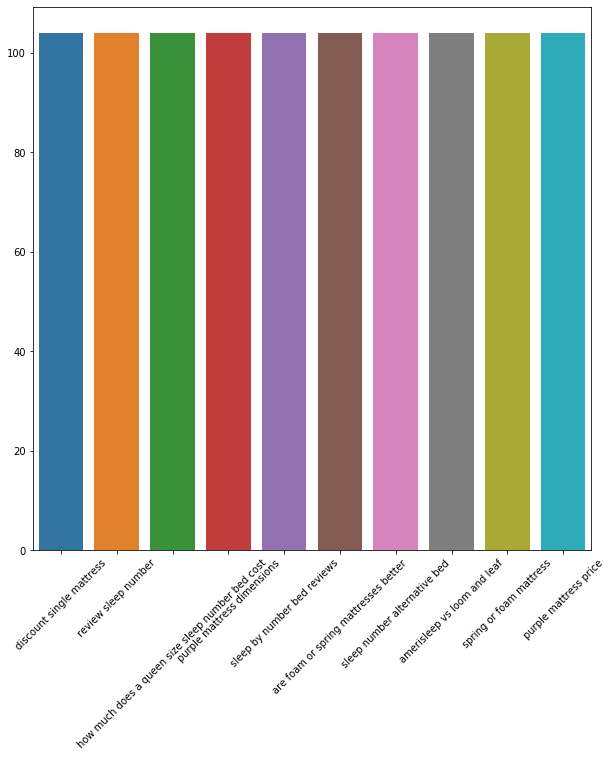

In [18]:
fig,ax=plt.subplots(figsize=(10,10))
chart=sns.barplot(x=data.index,y=data.values,ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

discount single mattress                            104
review sleep number                                 104
how much does a queen size sleep number bed cost    104
purple mattress dimensions                          104
sleep by number bed reviews                         104
are foam or spring mattresses better                104
sleep number alternative bed                        104
amerisleep vs loom and leaf                         104
spring or foam mattress                             104
purple mattress price                               104
Name: query, dtype: int64

In [13]:
df=df.set_index('nDate')

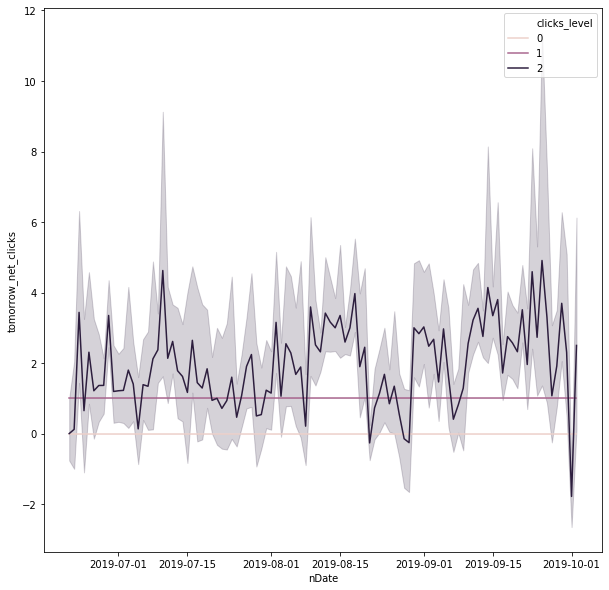

In [38]:
fig,ax=plt.subplots(figsize=(10,10))
sns.lineplot(ax=ax,x=df.index, y=df.tomorrow_net_clicks,hue=df.clicks_level)

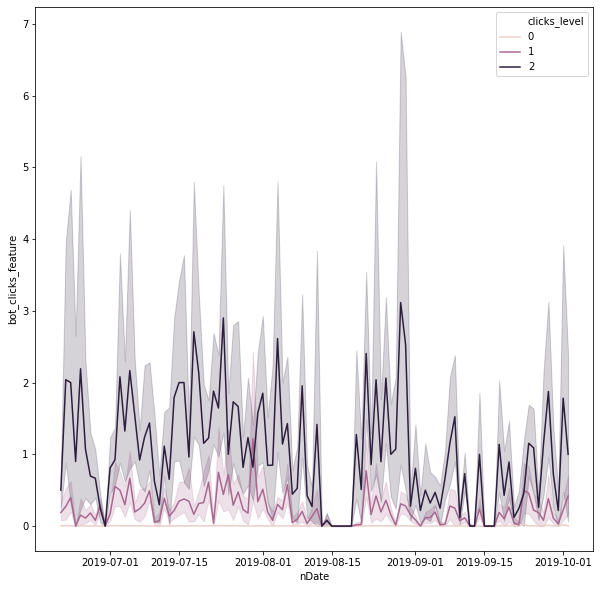

In [35]:
fig,ax=plt.subplots(figsize=(10,10))
sns.lineplot(ax=ax,x=df.index, y=df.bot_clicks_feature,hue=df.clicks_level)

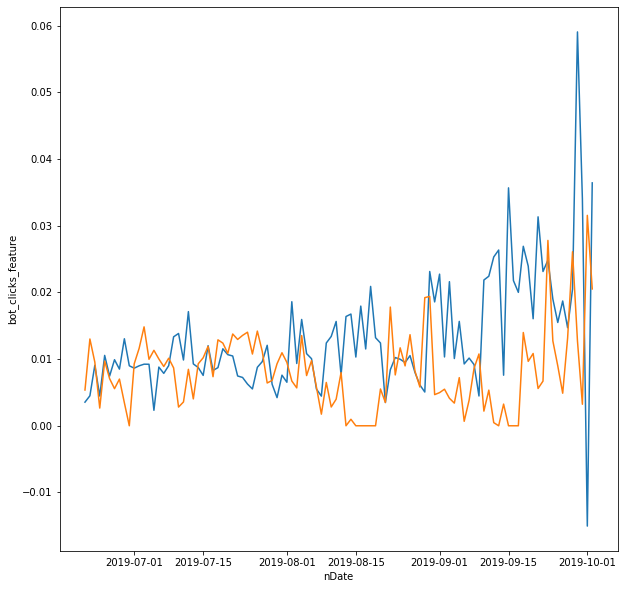

In [37]:
sums=df.groupby('nDate').mean()
fig,ax=plt.subplots(figsize=(10,10))
sns.lineplot(ax=ax,x=sums.index, y=sums.tomorrow_net_clicks,legend='brief')
sns.lineplot(ax=ax,x=sums.index, y=sums.bot_clicks_feature,legend='brief')

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


1700.0


In [22]:
print(IQR)

tomorrow_net_clicks     0.000000
bot_clicks_feature      0.000000
bcfeature1              0.000000
bcfeature2              0.000000
bcfeature3              0.000000
                          ...   
roll_p_feature3_all     5.233698
roll_p_feature7_all     3.620922
roll_p_feature30_all    2.607624
Mean                    0.001056
Median                  0.006956
Length: 64, dtype: float64


In [23]:
df.head()

,date,query,tomorrow_net_clicks,bot_clicks_feature,bcfeature1,bcfeature2,bcfeature3,bcfeature4,cfeature4,ifeature4,...,roll_i_feature3_all,roll_i_feature7_all,roll_i_feature30_all,roll_p_feature2_all,roll_p_feature3_all,roll_p_feature7_all,roll_p_feature30_all,Mean,Median,nDate
0,2019-06-21,?????,0,0,0,0,0,0,0,0,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.014119,0.003428,2019-06-21
1,2019-06-21,' mattress store,0,0,0,0,0,0,0,0,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.010589,0.006418,2019-06-21
2,2019-06-21,#1 rated mattress,0,0,0,0,0,0,0,0,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.010928,0.000463,2019-06-21
3,2019-06-21,10 best mattresses,0,0,0,0,0,0,0,0,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.011061,0.001539,2019-06-21
4,2019-06-21,100 cotton percale sheets queen,0,0,0,0,0,0,0,0,...,5716.333333,5104.857143,6170.533333,37.354981,38.114445,38.424932,33.990731,-0.010018,0.005830,2019-06-21
